In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

In [161]:
small_graphs_feats_path = pathlib.Path('./data/small_graphs_new_feats_merge.csv')

In [162]:
feats_df = pd.read_csv(small_graphs_feats_path)

In [163]:
feats_df.head()

city_name  city_id  streets_per_node_avg  node_density_km  \
0  6th of october     3881              3.074547       134.838226   
1             9th     4032              3.123626        50.469652   
2          aachen     2245              2.656357        99.808709   
3         aalborg     2486              2.547955       143.889085   
4          aarhus     2518              2.620561       141.914403   

   intersection_density_km  edge_density_km  street_density_km  \
0               129.955905     29758.680898       22894.690589   
1                49.637735     21212.274383       19026.130382   
2                78.028727     30088.459591       17058.828775   
3               101.025472     33429.217757       19072.796647   
4               104.059823     33875.790251       19395.066465   

   1way_int_count  2way_int_count  3way_int_count  ...  11way_int_prop  \
0             136               5            3061  ...             NaN   
1               6               1             299  ...             NaN   
2             896              89            2670  ...             NaN   
3            1202              31            2240  ...             NaN   
4            1645              57            3536  ...             NaN   

   12way_int_prop  13way_int_count  14way_int_count  15way_int_count  \
0             NaN              NaN              NaN              NaN   
1             NaN              NaN              NaN              NaN   
2             NaN              NaN              NaN              NaN   
3             NaN              NaN              NaN              NaN   
4             NaN              NaN              NaN              NaN   

   16way_int_count  13way_int_prop  14way_int_prop  15way_int_prop  \
0              NaN             NaN             NaN             NaN   
1              NaN             NaN             NaN             NaN   
2              NaN             NaN             NaN             NaN   
3              NaN             NaN             NaN             NaN   
4              NaN             NaN             NaN             NaN   

   16way_int_prop  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 39 columns]

# Juntando com indicadores originais

In [164]:
indicators_path = pathlib.Path('./data/indicators.csv')
indicators_df = pd.read_csv(indicators_path)

In [165]:
indicators_df.head()

country country_iso   core_city  uc_id  cc_avg_dir  cc_avg_undir  \
0       indonesia         IDN       wates  12375    0.036690      0.038630   
1          brazil         BRA  taquaralto   1186    0.024520      0.035016   
2           china         CHN     xinqiao  12218    0.036481      0.045724   
3        colombia         COL       yopal    687    0.016110      0.019414   
4  czech_republic         CZE      pilsen   2886    0.032913      0.044298   

   cc_wt_avg_dir  cc_wt_avg_undir  circuity  elev_iqr  ...  prop_3way  \
0       0.004276         0.004359  1.065403      11.0  ...   0.743653   
1       0.001195         0.001439  1.008276      18.0  ...   0.589312   
2       0.001608         0.001723  1.016544       2.0  ...   0.486911   
3       0.001072         0.001221  1.011106      16.0  ...   0.583149   
4       0.001418         0.001758  1.047311      24.0  ...   0.536906   

   prop_deadend  self_loop_proportion  straightness  \
0      0.171990              0.000619      0.938612   
1      0.043543              0.000000      0.991791   
2      0.125654              0.000000      0.983725   
3      0.056171              0.000460      0.989016   
4      0.250421              0.001013      0.954826   

                            uc_names                     world_region  \
0                              Wates                             Asia   
1                         Taquaralto  Latin America and the Caribbean   
2  Xinqiao; Jiepai; Baqiao; Houxiang                             Asia   
3                              Yopal  Latin America and the Caribbean   
4                             Pilsen                           Europe   

      world_subregion  resident_pop  area  built_up_area  
0  South-Eastern Asia        107046  28.0       4.717896  
1       South America         90077  20.0       9.620359  
2        Eastern Asia        104714  42.0      22.057976  
3       South America        167421  16.0       5.645732  
4      Eastern Europe        142248  53.0      28.124355  

[5 rows x 39 columns]

In [166]:
final_df = indicators_df.merge(feats_df, left_on='uc_id', right_on='city_id')
final_df.drop('city_id', axis=1, inplace=True)

In [168]:
final_df.describe().T

count         mean          std  min          25%  \
uc_id            8580.0  6385.847552  4166.877928  1.0  2498.750000   
cc_avg_dir       8580.0     0.033434     0.017286  0.0     0.023048   
cc_avg_undir     8580.0     0.040141     0.021227  0.0     0.026542   
cc_wt_avg_dir    8580.0     0.002140     0.003634  0.0     0.000898   
cc_wt_avg_undir  8580.0     0.002324     0.003685  0.0     0.001016   
...                 ...          ...          ...  ...          ...   
16way_int_count    20.0     0.050000     0.223607  0.0     0.000000   
13way_int_prop     40.0     0.000002     0.000011  0.0     0.000000   
14way_int_prop     40.0     0.000005     0.000035  0.0     0.000000   
15way_int_prop     20.0     0.000000     0.000000  0.0     0.000000   
16way_int_prop     20.0     0.000003     0.000015  0.0     0.000000   

                         50%           75%           max  
uc_id            6061.500000  10640.250000  13135.000000  
cc_avg_dir          0.031144      0.040893      0.333333  
cc_avg_undir        0.036303      0.049907      0.333333  
cc_wt_avg_dir       0.001473      0.002393      0.166229  
cc_wt_avg_undir     0.001654      0.002622      0.166229  
...                      ...           ...           ...  
16way_int_count     0.000000      0.000000      1.000000  
13way_int_prop      0.000000      0.000000      0.000067  
14way_int_prop      0.000000      0.000000      0.000219  
15way_int_prop      0.000000      0.000000      0.000000  
16way_int_prop      0.000000      0.000000      0.000067  

[70 rows x 8 columns]

## Coisas estranhas

Cidades sem nome:

In [171]:
final_df[final_df['city_name'] == 'unnamed']['country'].value_counts()

china                               166
india                                31
russia                               15
bangladesh                            6
sudan                                 4
pakistan                              4
north_korea                           2
thailand                              2
nigeria                               2
japan                                 2
iran                                  2
saudi_arabia                          2
tanzania                              1
uzbekistan                            1
myanmar                               1
democratic_republic_of_the_congo      1
south_korea                           1
kazakhstan                            1
kyrgyzstan                            1
egypt                                 1
zambia                                1
mozambique                            1
angola                                1
tajikistan                            1
Name: country, dtype: int64

## Correlações entre as variáveis

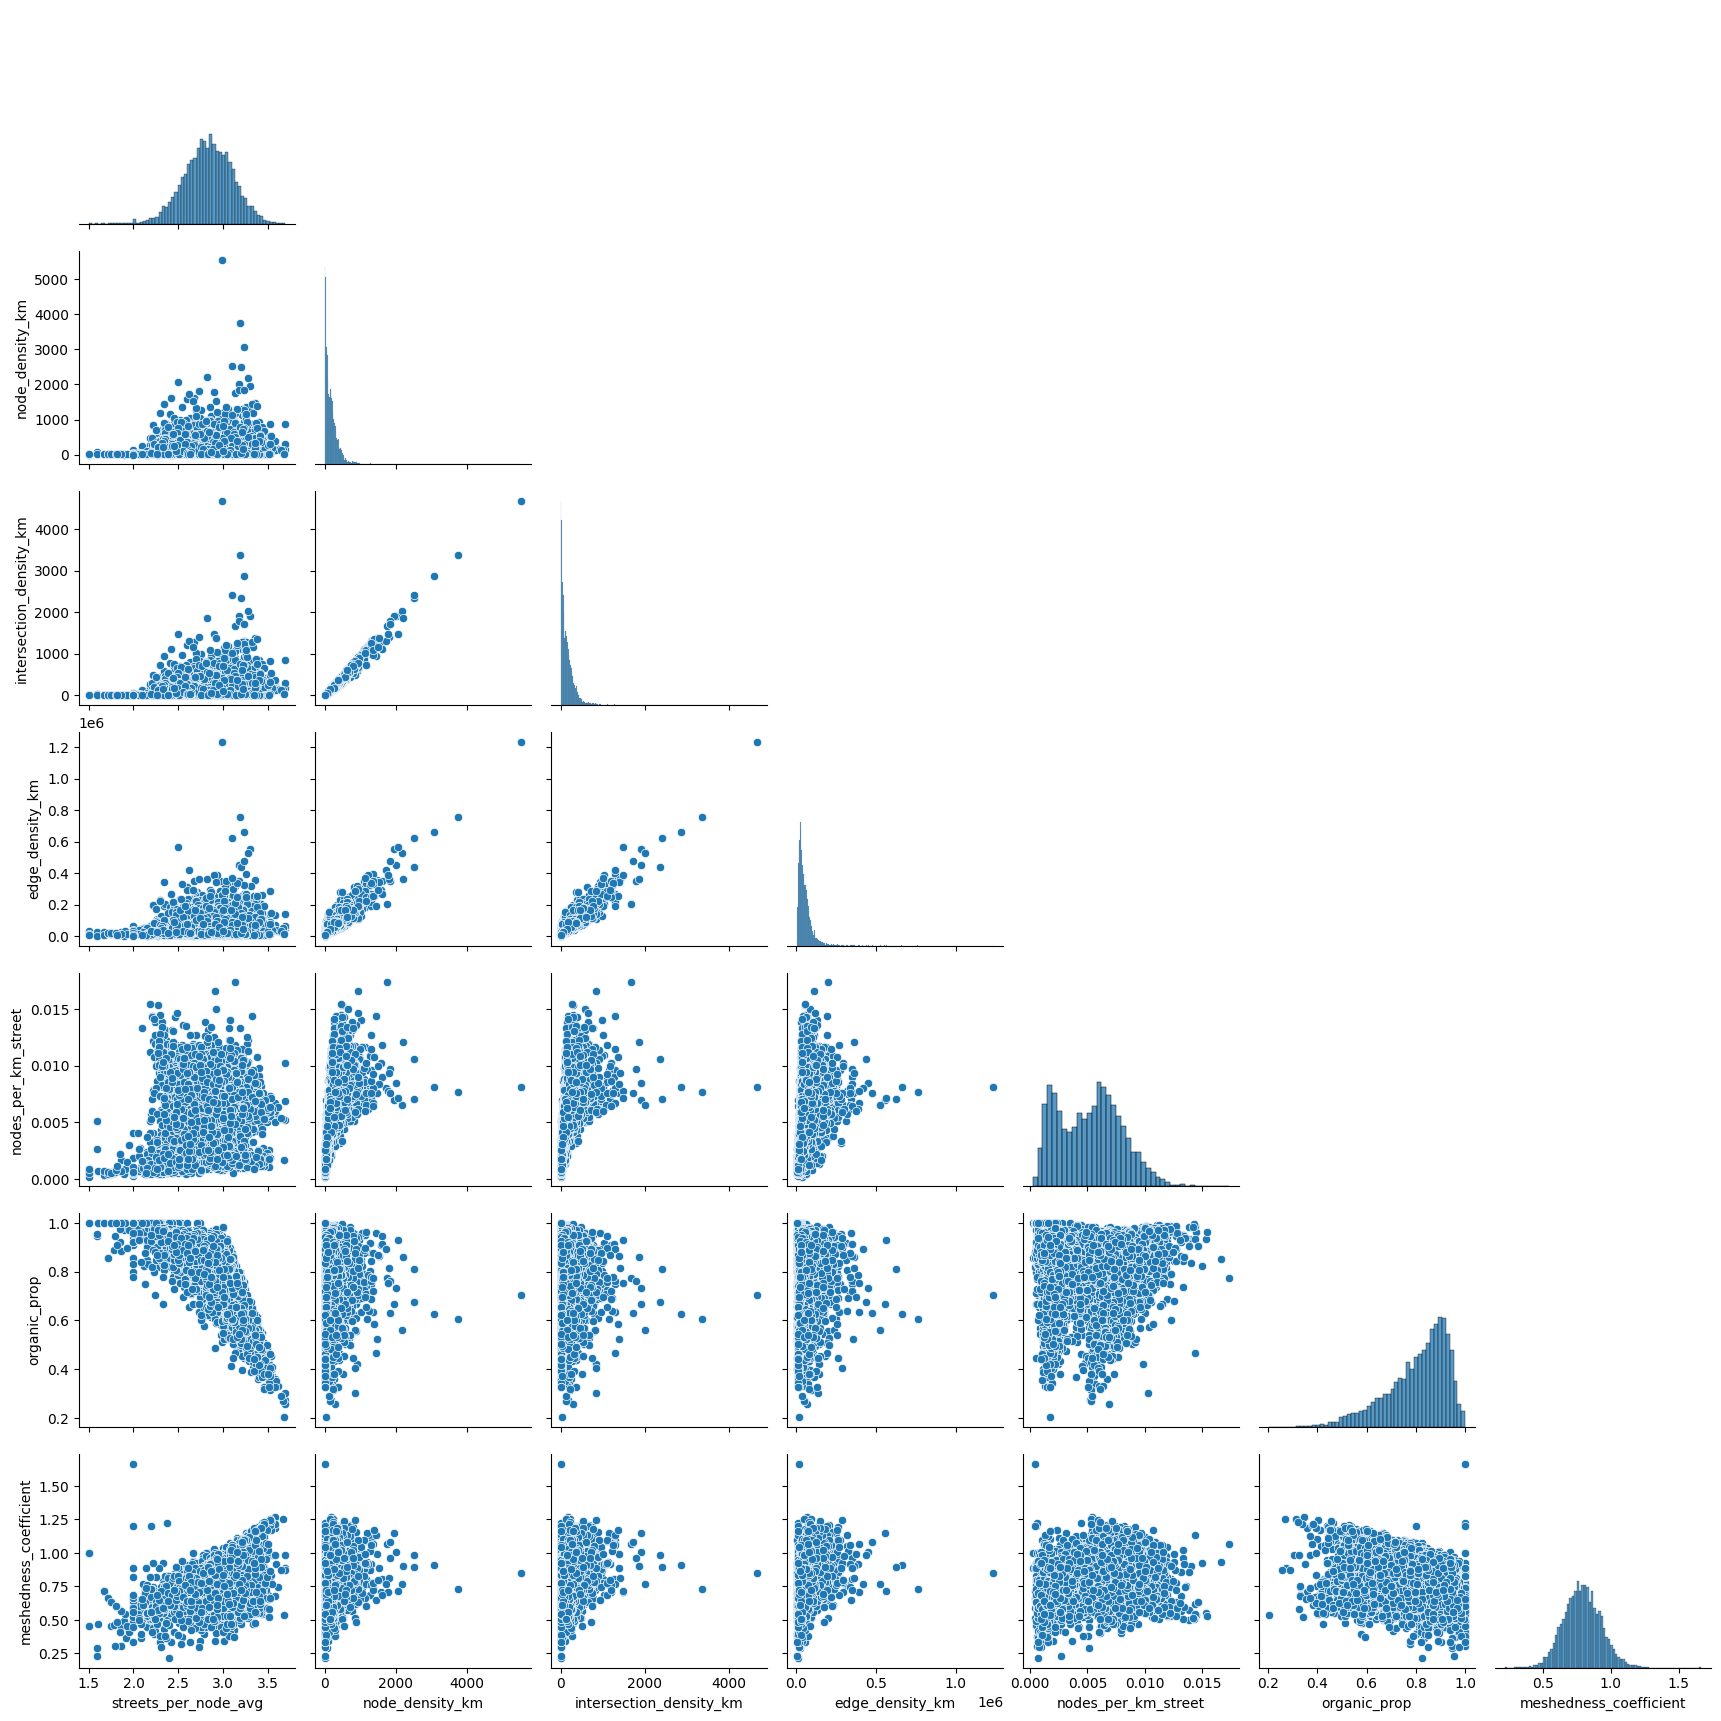

In [173]:
target_cols = ['streets_per_node_avg', 'node_density_km', 'intersection_density_km', 'edge_density_km',
              'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient']
sns.pairplot(final_df[target_cols], corner=True)

Por variável:

- **streets_per_node**: Essa variável possui uma distribuição normal. Ela parece possuir uma correlação com **nodes_per_km_street**, o que é compreensível. Também possui uma boa correlação negativa com **organic_prop**, o que também faz sentido já que quanto maior o grau médio dos nós, mais indica que as ruas seguem um grid, o que diminui o **organic_prop**. Também possui uma certa correlação positiva com o **meshedness_coefficient**.
- **node_density_km**: Possui uma correlação positiva quase perfeita com **intersection_density_km**, o que é de se esperar e com **edge_density_km**. Lembrando que **intersection_density_km** não leva em consideração ruas sem saída, enquanto **edge_density_km** leva.
- **intersection_density_km**: Possui uma correlação positiva quase perfeita com **edge_density_km**, o que já era de se esperar.
- **edge_density_km**: Não possui uma correlação com as outras variáveis que sobraram. A sua relação com **organic_prop** indica que a maioria das cidades não possui uma alta densidade de arestas e isso não influencia na proporção orgânica. Isso poderia ser óbvio já que na conta de **organic_prop** não é levado em consideração nenhuma densidade.
- **nodes_per_km_street**: Parece haver uma subdivisão em dois grupos de cidades com relação ao **organic_prop**
- **organic_prop**: Parece haver uma leve correlação negativa com o **meshedness_coefficient**, entretanto, existe muita variação.

## Sobre *organic_prop*

Text(0.5, 1.0, 'organic_prop dist')

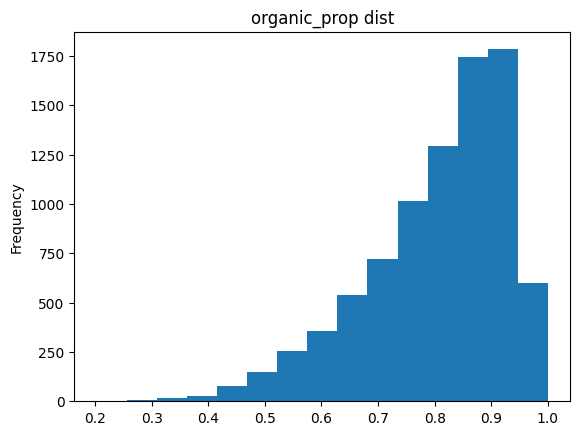

In [174]:
final_df['organic_prop'].plot(kind='hist', bins=15)
plt.title('organic_prop dist')

In [175]:
full_organic_cities = final_df[final_df['organic_prop'] == 1]

In [27]:
full_organic_cities[40:]

city_name  city_id  streets_per_node_avg  node_density_km  \
5092      senapati    10081              2.000000         5.490592   
5097       seohara     7219              2.100000         8.153135   
5161      shajapur     7241              1.750000         4.187738   
5230       sherkot     7208              2.400000        12.747216   
5422        siwana     6565              2.000000        13.043889   
5459        sonari    10087              2.142857         2.470059   
5722         tanda     7309              1.666667         5.563917   
5803       barhiya     9151              2.478261        10.127540   
6028       barwaha     7271              2.250000         4.139880   
6121          tura     9818              1.500000         3.875053   
6175        ukhrul    10098              2.111111         3.646725   
6294       unnamed    11450              2.294118        11.486983   
6435       unnamed     6535              2.000000         4.535996   
6446       unnamed     7683              2.000000         3.379163   
6455       unnamed     9188              2.428571         8.786414   
6456       unnamed     9497              2.250000         4.397431   
6458       unnamed     9625              1.666667         2.183195   
6459       unnamed     9658              1.666667         2.016211   
6485       unnamed     9793              1.500000         3.870108   
6679  wan bhachran     6283              2.454545        13.644232   
6690         ahore     6607              2.708333        38.365410   
7270     zhenxiabo    11322              1.750000         5.882616   
7358  bethuadahari     9687              2.200000        15.705813   
7394     bholarhat     9577              2.300000        18.012613   
7434           bin    11210              2.200000        14.602356   
7498       akabuka     2470              2.315789        11.488080   
7842         chafe     2496              1.800000         4.991347   
8061    chutmalpur     7001              2.280000        21.582537   
8250       damagum     2944              1.857143        13.503659   
8345         demba     3483              2.250000         5.728628   
8439        digboi    10099              2.000000         6.716977   
8493          doma     2721              2.600000         7.636989   
8556       dundewa     2906              2.066667        21.870975   

      intersection_density_km  edge_density_km  street_density_km  \
5092                 2.745296     15990.274679        7995.137339   
5097                 4.484224     10229.372241        5114.686120   
5161                 1.570402     14389.777956        7194.888978   
5230                 8.923051     18741.830897        9370.915448   
5422                 6.521944     25852.782031       12926.391015   
5459                 1.411462      8959.602296        4479.801148   
5722                 1.854639     28411.536176       14205.768088   
5803                 7.485573     16234.665183        8117.332592   
6028                 2.587425     15170.640210        7585.320105   
6121                 0.968763     34390.240227       17195.120113   
6175                 2.025958     14481.448560        7240.724280   
6294                 7.432754     21310.762710       11989.781961   
6435                 2.267998     13929.622010        6964.811005   
6446                 1.689582     14664.086683        7332.043341   
6455                 6.276010     15822.715195        7911.357597   
6456                 2.748394     12745.041421        6372.520710   
6458                 0.727732      6440.028605        3220.014302   
6459                 0.672070      5801.711786        2900.855893   
6485                 0.967527      9027.077125        4513.538563   
6679                 9.923078     16418.685267        8362.004848   
6690                32.770454     35369.023158       17684.511579   
7270                 2.205981     24285.586053       12142.793026   
7358                 9.423488     23500.0

In [186]:
low_organic_cities = final_df[final_df['organic_prop'] < 0.5]

In [187]:
len(low_organic_cities)

177

### Distribuição de variáveis entre as orgânicas e não orgânicas

Definindo cidades como orgânicas ou não

In [205]:
final_df['organic'] = final_df['organic_prop'].apply(lambda x: x>0.5)

Text(0.5, 1.0, 'Non-organic cities per subregion of the world')

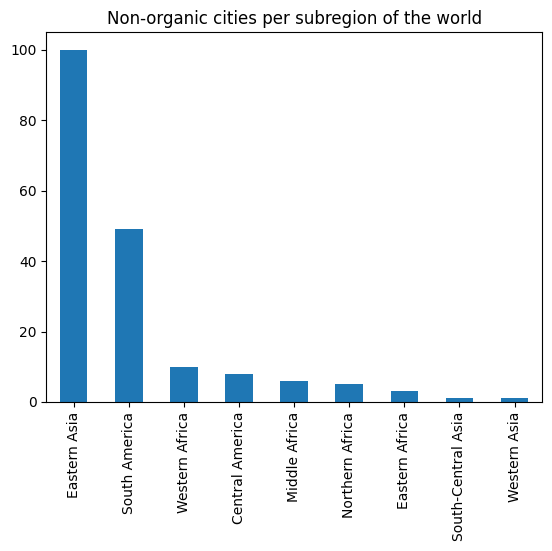

In [212]:
final_df[final_df['organic'] == False]['world_subregion'].value_counts().plot(kind='bar')
plt.title("Non-organic cities per subregion of the world")

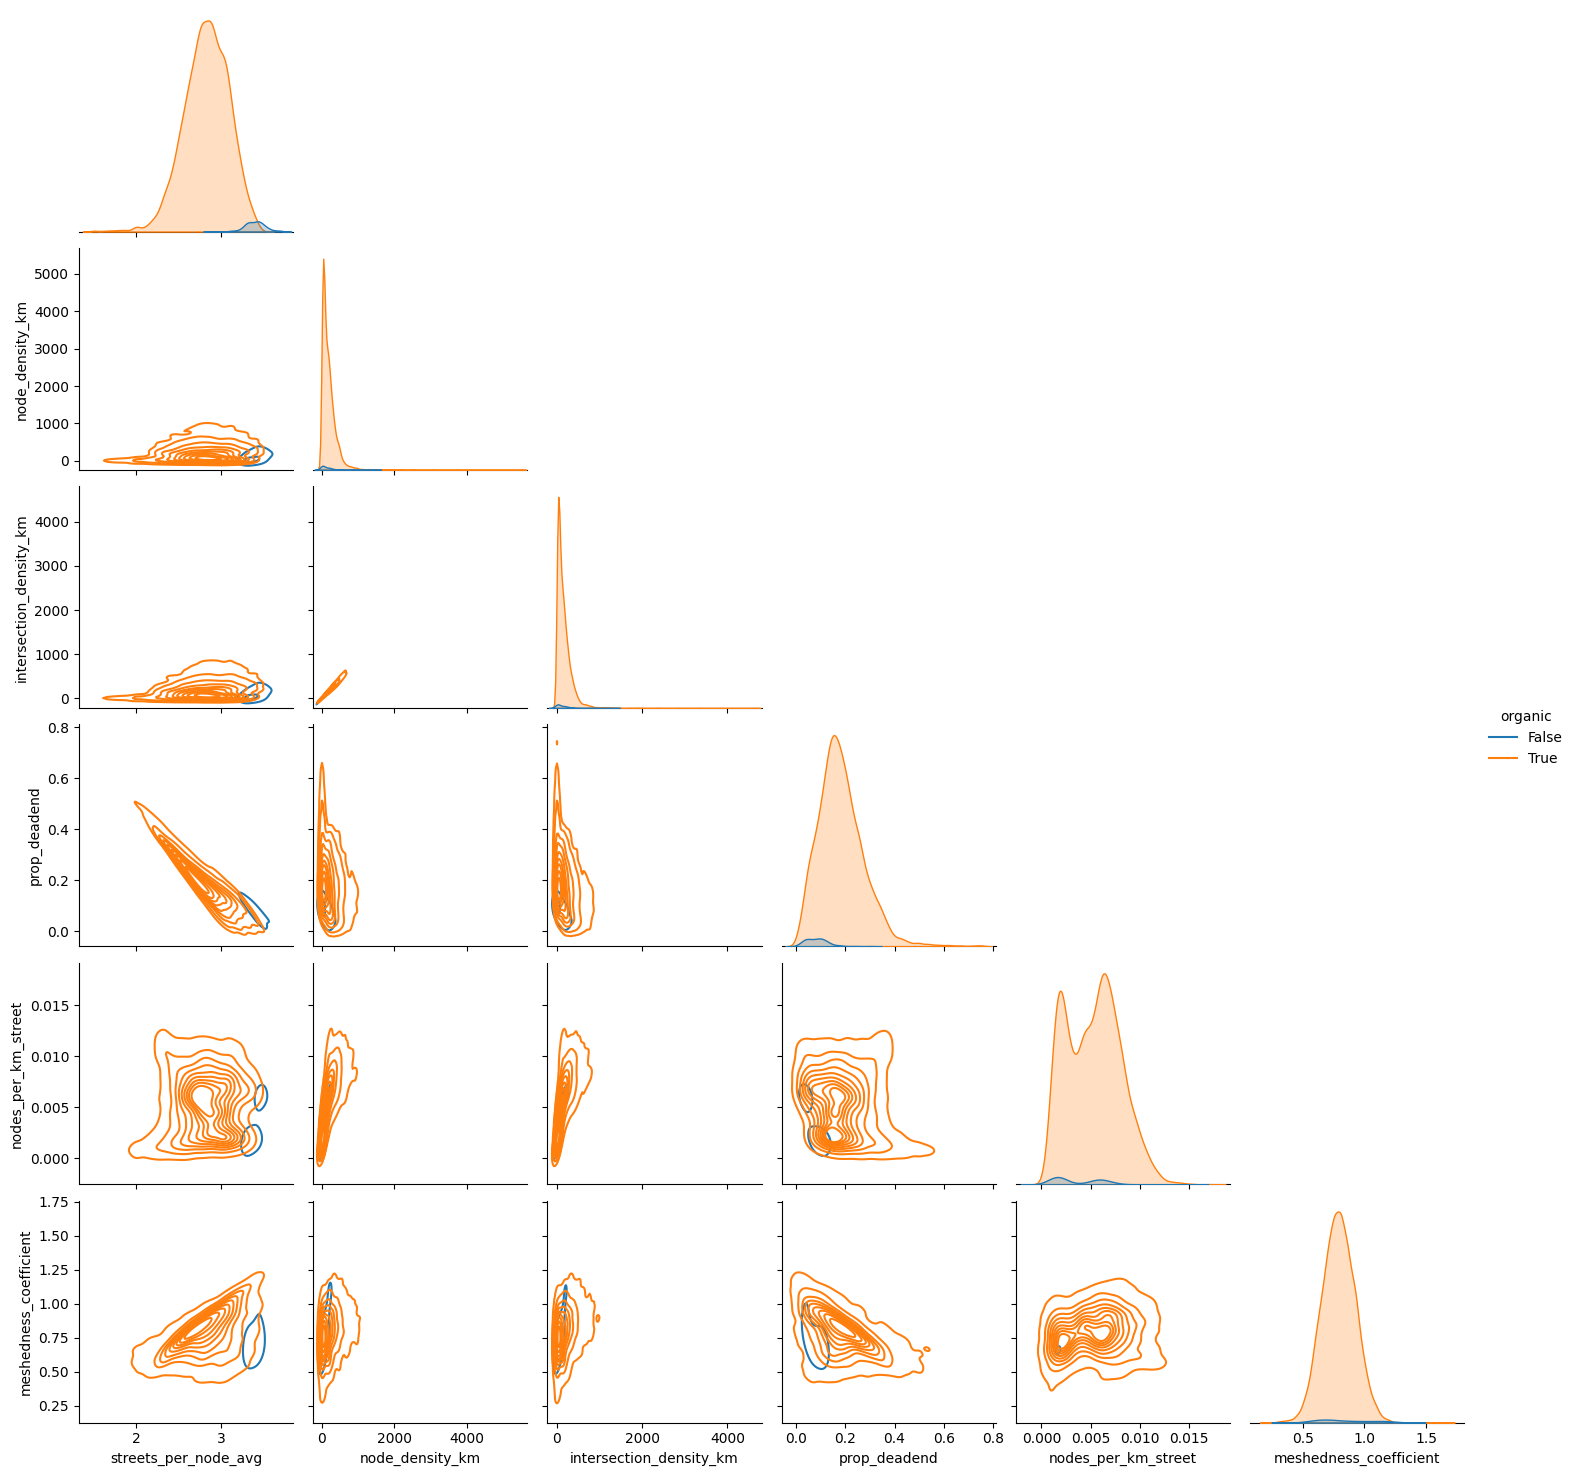

In [213]:
target_cols = ['streets_per_node_avg', 'node_density_km', 'intersection_density_km',
               'prop_deadend', 'nodes_per_km_street', 'meshedness_coefficient']
sns.pairplot(final_df[target_cols + ['organic']], corner=True, kind='kde', hue='organic', hue_order = [False, True])

## Correlação de Variáveis todas as regiões

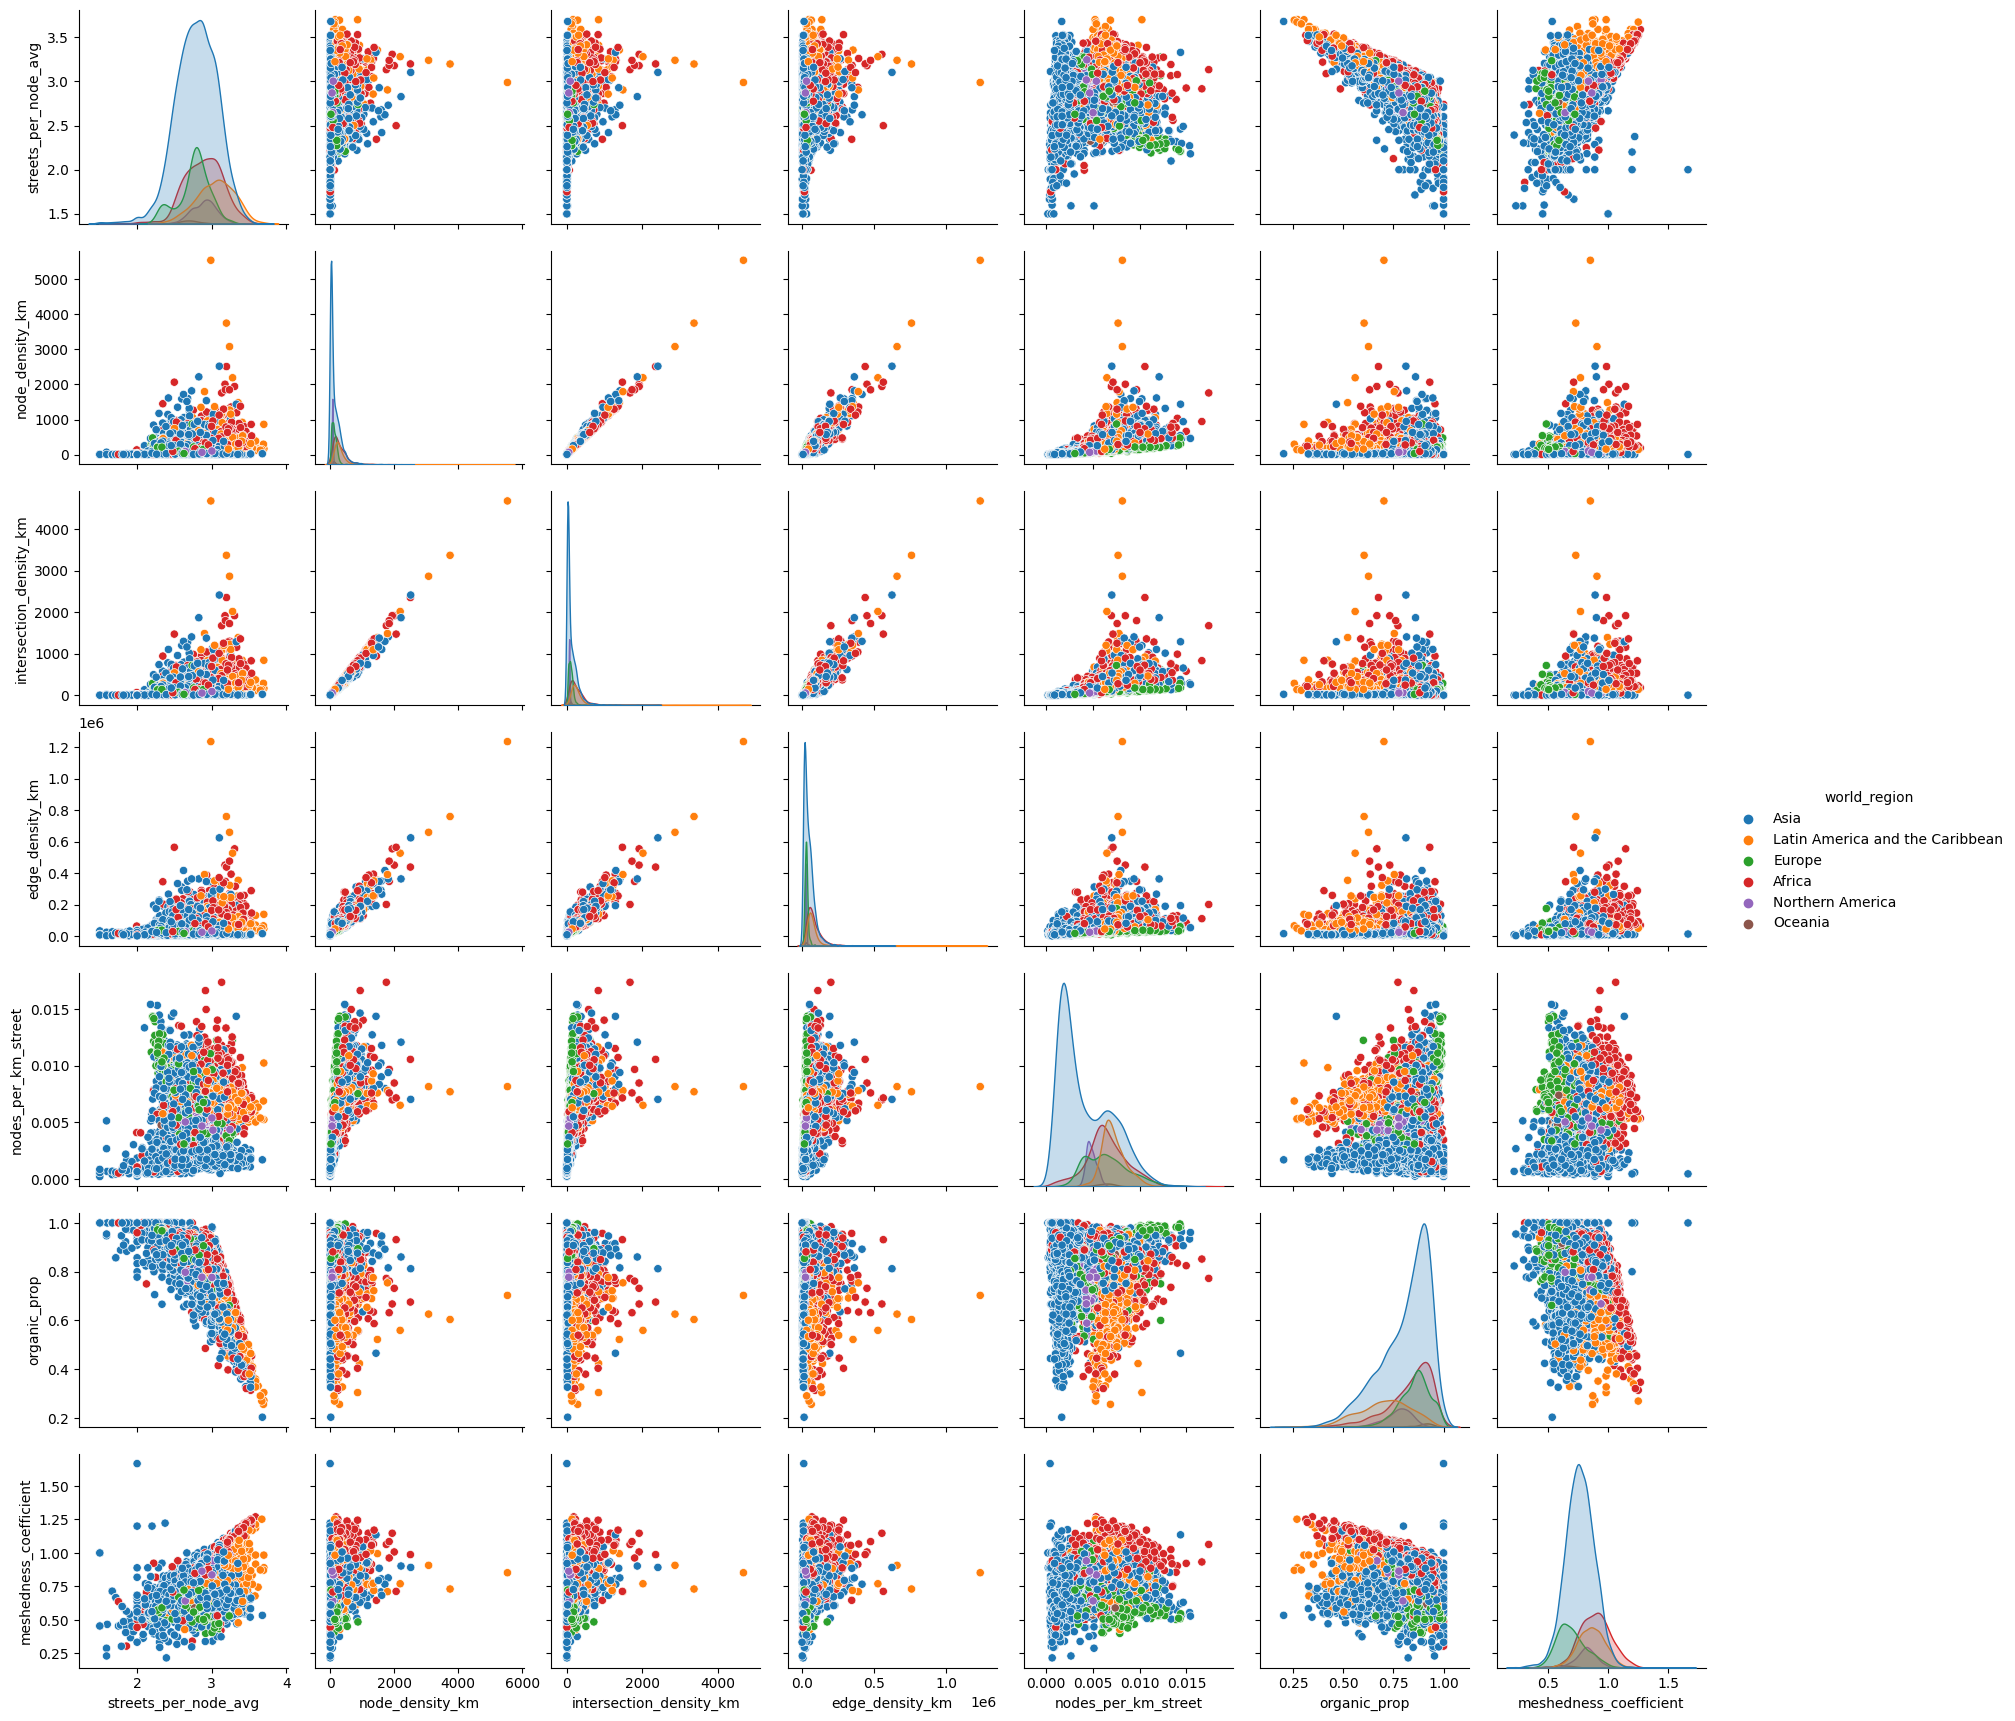

In [57]:
new_target_cols = [
    'streets_per_node_avg', 'node_density_km', 'intersection_density_km', 'edge_density_km',
    'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient', 'world_region'
]
sns.pairplot(final_df[new_target_cols], hue='world_region')

## Dividindo dados por região

In [126]:
asian_cities = final_df[final_df['world_region'] == "Asia"]
latin_cities = final_df[final_df['world_region'] == "Latin America and the Caribbean"]
europe_cities = final_df[final_df['world_region'] == "Europe"]
north_america_cities = final_df[final_df['world_region'] == "Northern America"]
africa_cities = final_df[final_df['world_region'] == "Africa"]
oceania_cities = final_df[final_df['world_region'] == "Oceania"]

### Análise por região

In [127]:
def plot_corr(data:pd.DataFrame, cols_to_drop:list):
    corr = data.drop(cols_to_drop, axis=1).corr(numeric_only=True)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [149]:
to_drop = ['6way_int_count', '6way_int_prop', '7way_int_count', '7way_int_prop',
           '8way_int_count', '8way_int_prop', '9way_int_count', '9way_int_prop',
           '10way_int_count', '10way_int_prop', '11way_int_count',
           '12way_int_count', '11way_int_prop', '12way_int_prop',
           '13way_int_count', '14way_int_count', '15way_int_count',
           '16way_int_count', '13way_int_prop', '14way_int_prop', '15way_int_prop',
           '16way_int_prop', '2way_int_count', '5way_int_prop', '1way_int_count',
           '3way_int_count', '4way_int_count', '5way_int_count', '2way_int_prop',
           'uc_id', 'elev_iqr', 'elev_median', 'elev_range', 'elev_std', 'grade_mean', 
           'grade_median']

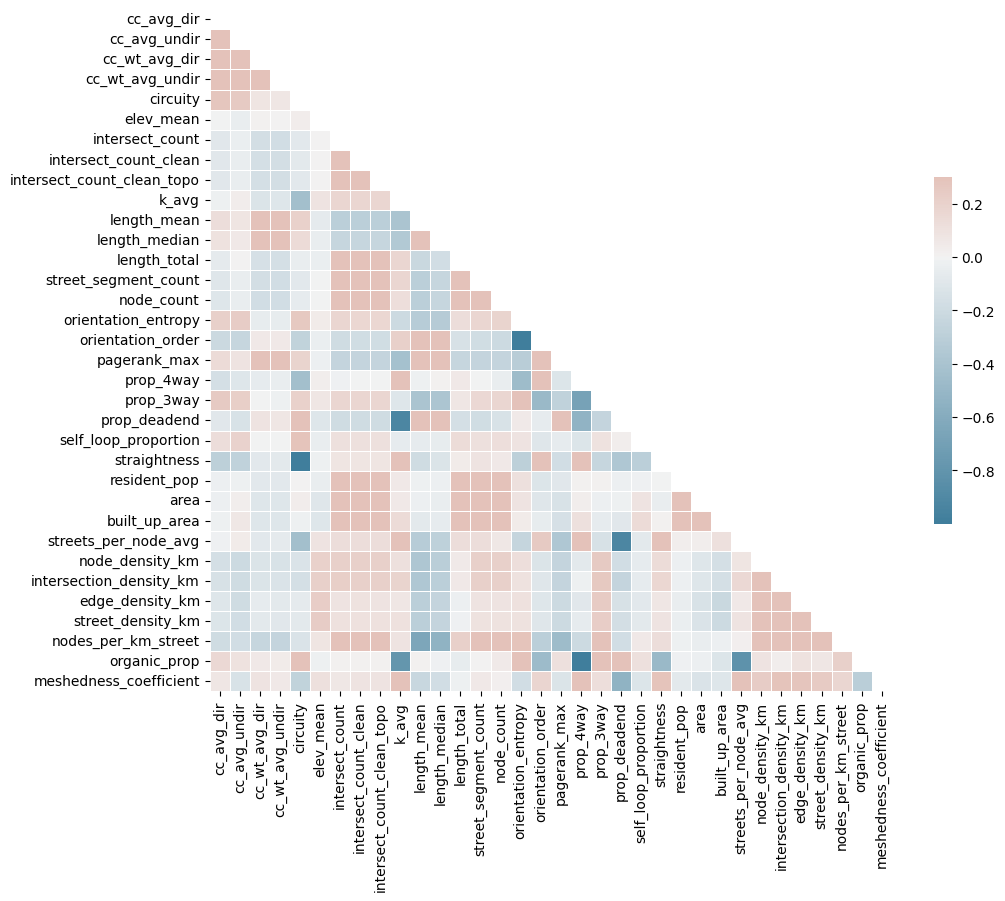

In [159]:
plot_corr(final_df, to_drop)

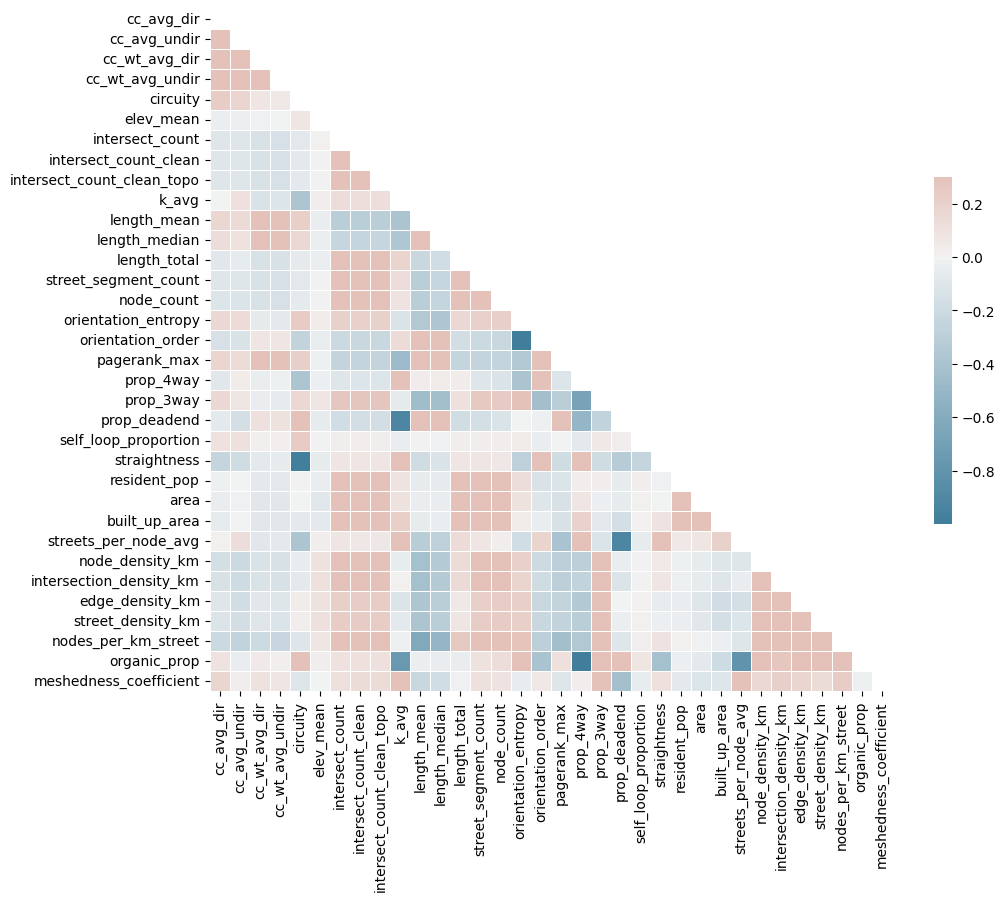

In [150]:
plot_corr(asian_cities, to_drop)

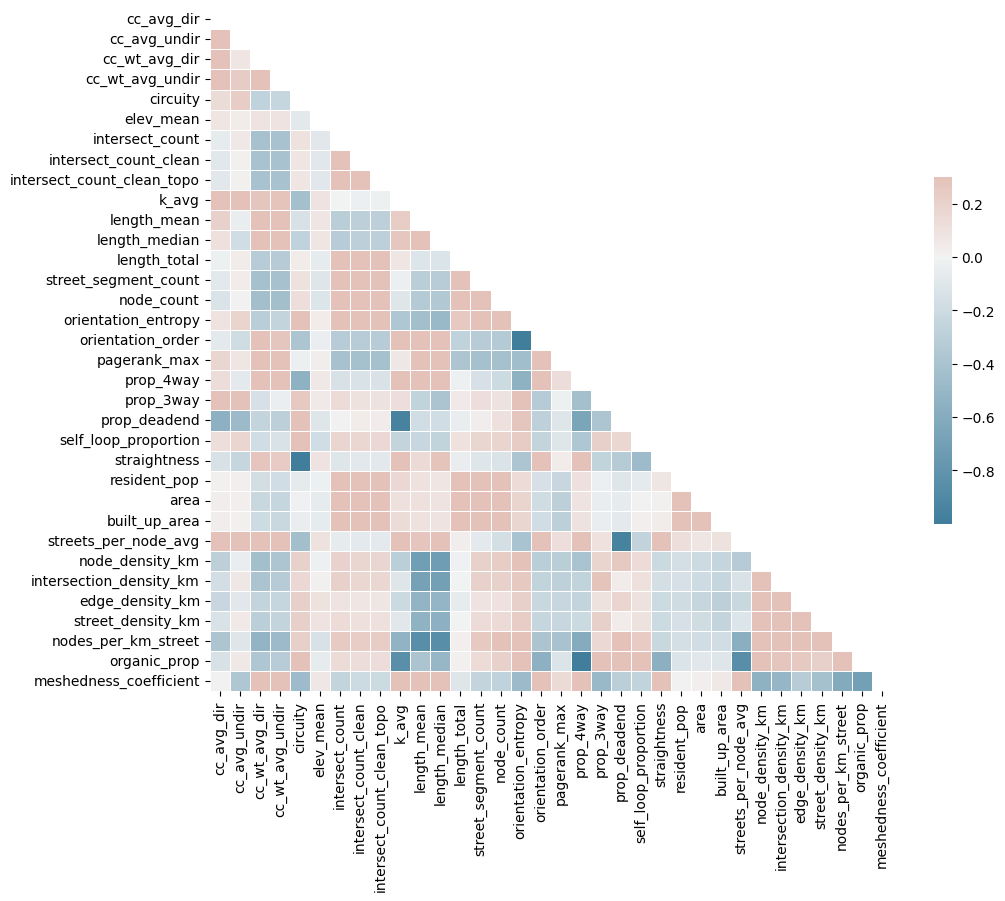

In [152]:
plot_corr(europe_cities, to_drop)

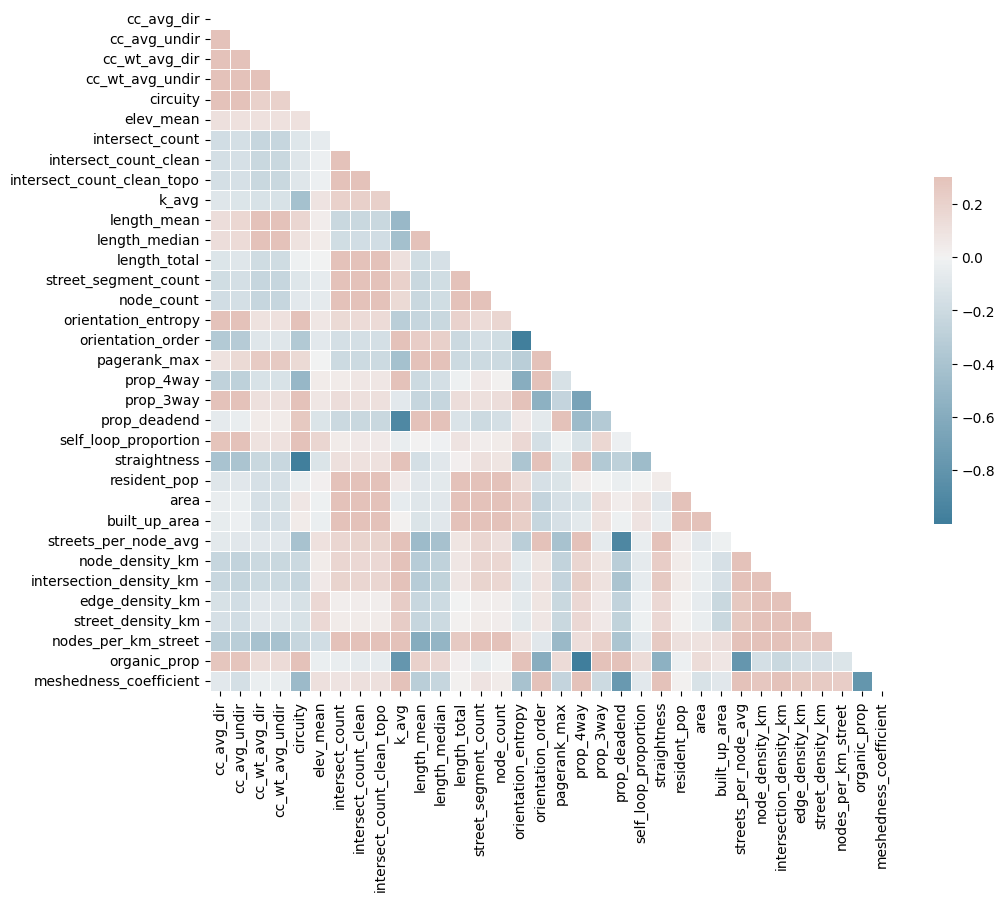

In [153]:
plot_corr(africa_cities, to_drop)

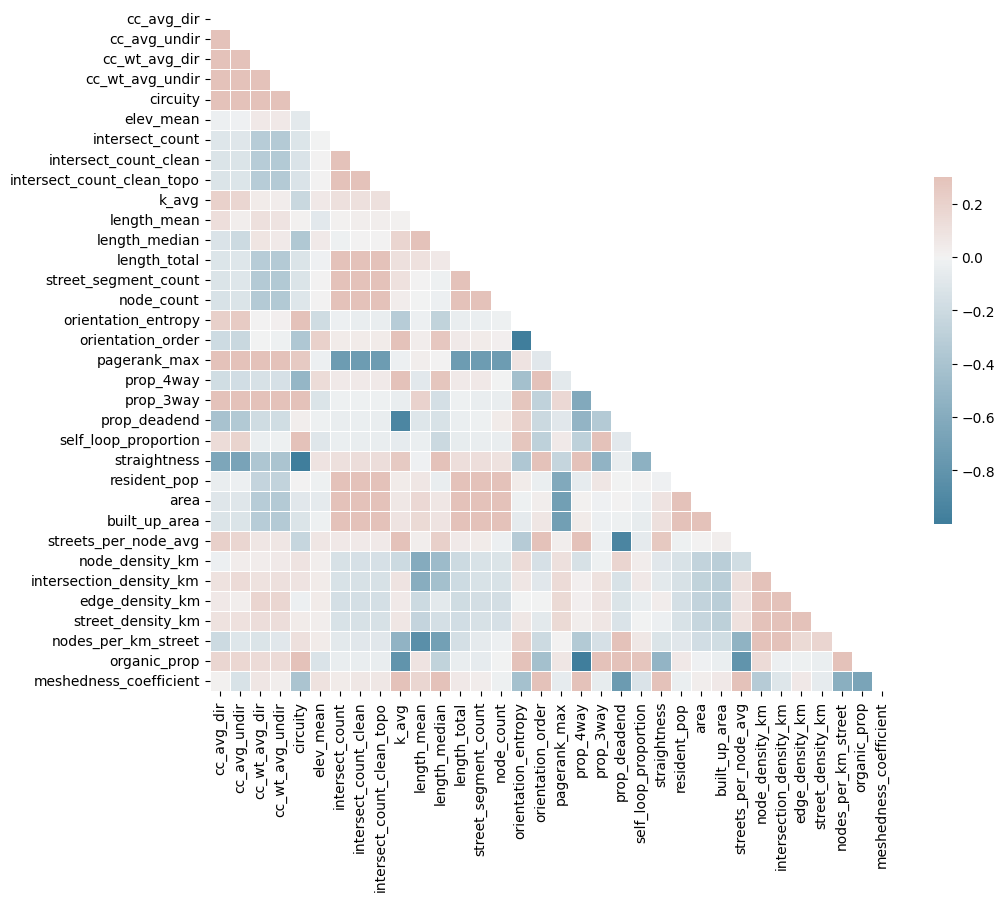

In [154]:
plot_corr(north_america_cities, to_drop)

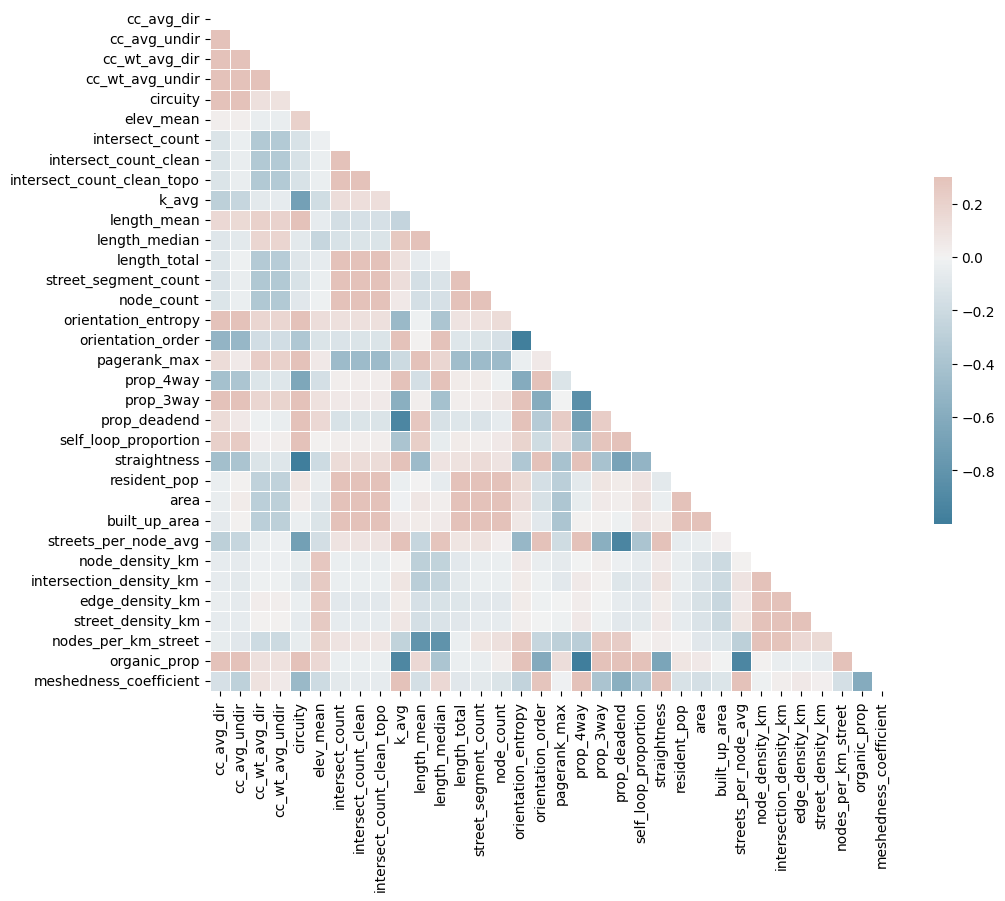

In [155]:
plot_corr(latin_cities, to_drop)

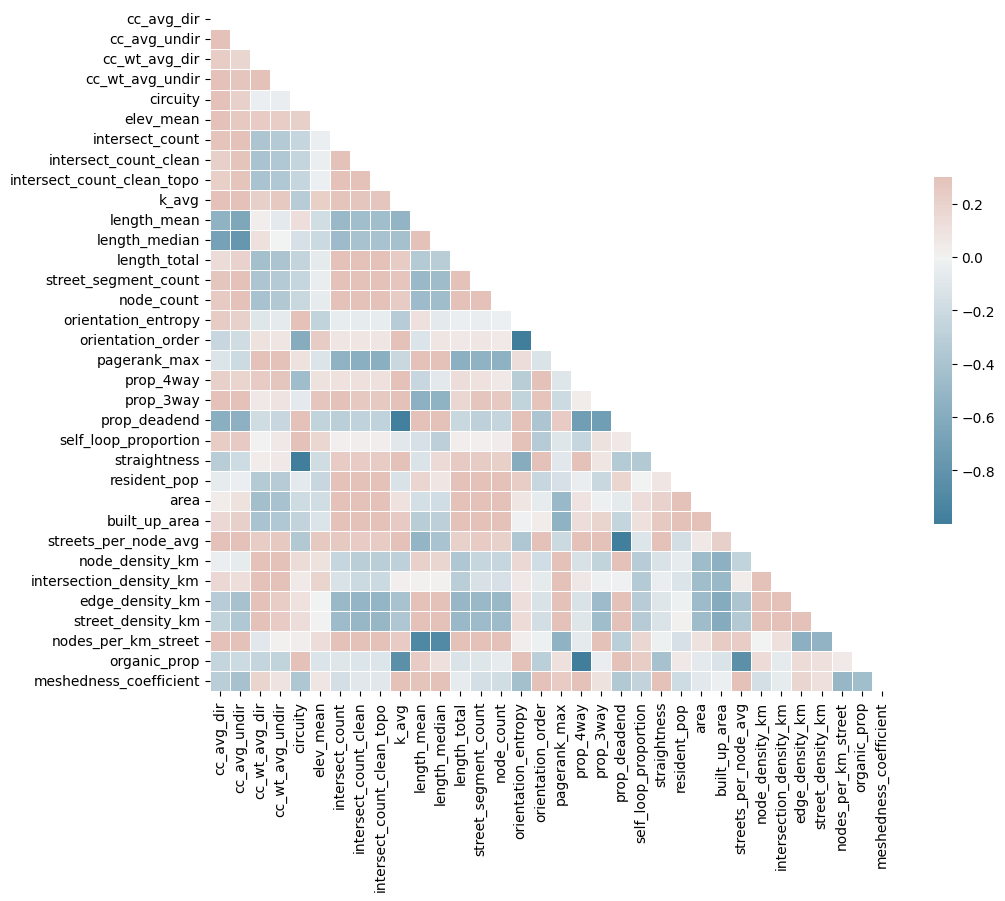

In [156]:
plot_corr(oceania_cities, to_drop)

## *organic_prop* por região

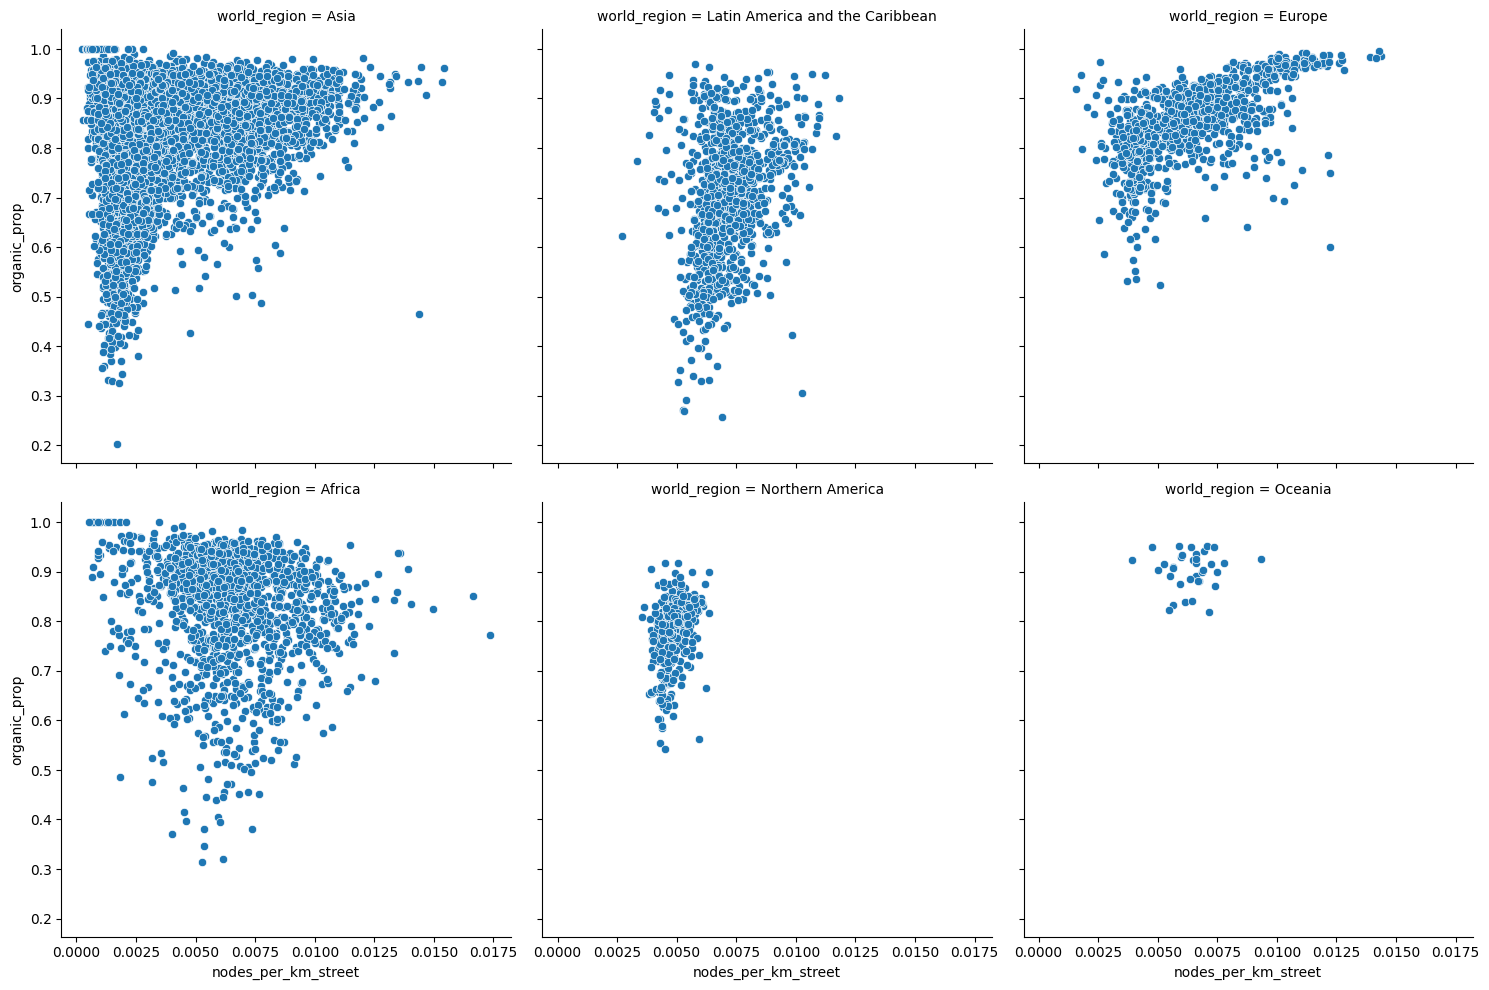

In [71]:
sns.relplot(data=final_df, x='nodes_per_km_street', y='organic_prop', col='world_region', col_wrap=3)

Com esse plot é possível ver que os "dois grupos" que aparentavam existir é devido a grande quantidade de cidades asiáticas com baixa proporção de nós por km em comparação com as outras regiões.

# Variáveis por região

## Ásia

In [76]:
asian_cities = final_df[final_df['world_region'] == "Asia"]

### *organic_prop* na ásia

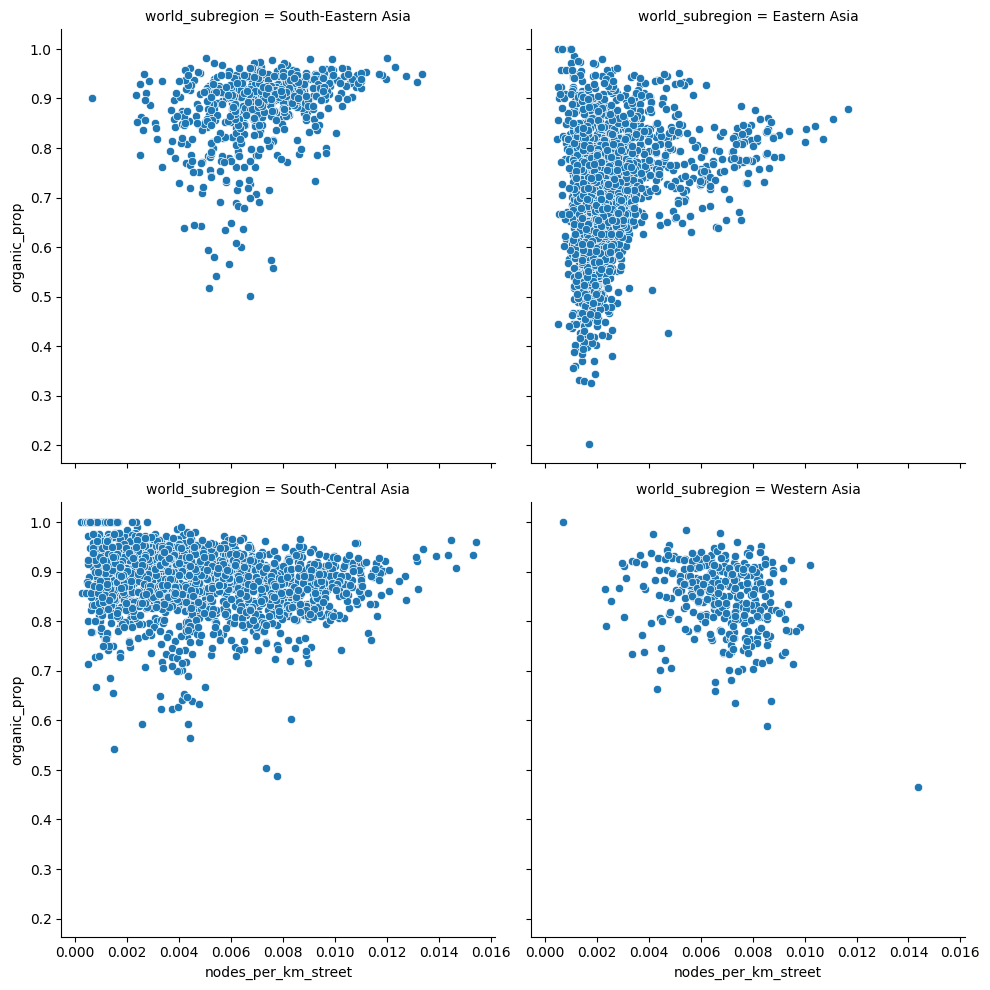

In [78]:
sns.relplot(data=asian_cities, x='nodes_per_km_street', y='organic_prop', col='world_subregion', col_wrap=2)

Para a Ásia, é possível ver cerca de 3 grupos diferentes: Grupo 1: Eastern Asia, Grupo 2: South-Central Asia e Grupo 3: Western Asia com South-Eastern Asia.

As cidades do Grupo 2 e Grupo 3 tem um maior valor de **organic_prop**. As do Grupo 2 tem uma grande variação de *nodes_per_km_street*, enquanto as do Grupo 3 possuem menos variação e tem uma média maior.

Já as cidades de Eastern Asia possuem uma variação de uma ponta a outra do *organic_prop*, mantendo uma baixa proporção de *nodes_per_km_street*.

No geral, pode-se pensar que ter menos nós por km de rua indica quarteirões maiores ou até mesmo cidades em regiões montanhosas que possuem ruas de maior comprimento sem muitas intersecções.

In [101]:
regional_target_cols1 = [
    'circuity', 'k_avg', 'streets_per_node_avg', 'prop_4way', 'prop_3way', 'node_density_km',
    'world_subregion'
]
regional_target_cols2 = [
    'intersection_density_km', 'edge_density_km', 'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient',
    'world_subregion'
]

all_targets = ['circuity', 'k_avg', 'streets_per_node_avg', 'prop_4way', 'prop_3way', 'node_density_km',
               'intersection_density_km', 'edge_density_km', 'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient',
               'straightness', 'prop_3way', 'built_up_area', 'node_count'
              ]

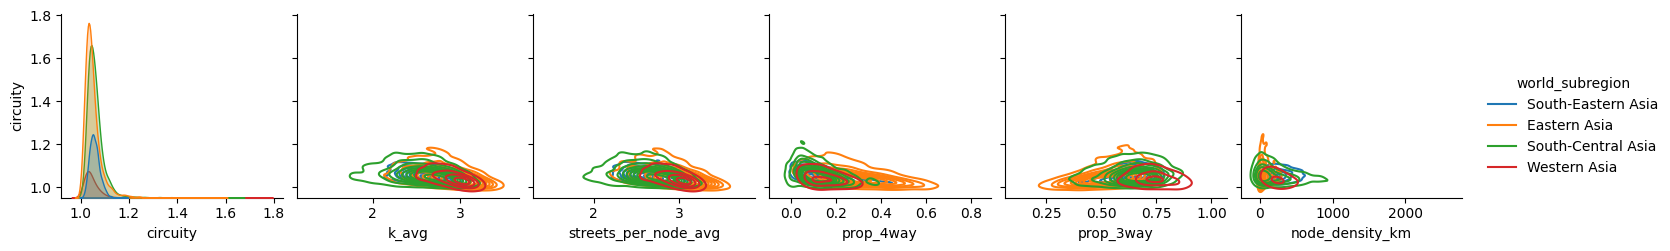

In [95]:
for col in regional_target_cols1[:1]:
    sns.pairplot(asian_cities[regional_target_cols1], hue='world_subregion', kind= 'kde', y_vars = [col])
#     sns.pairplot(asian_cities[regional_target_cols2], hue='world_subregion', kind= 'kde', y_vars = [col])

<AxesSubplot: >

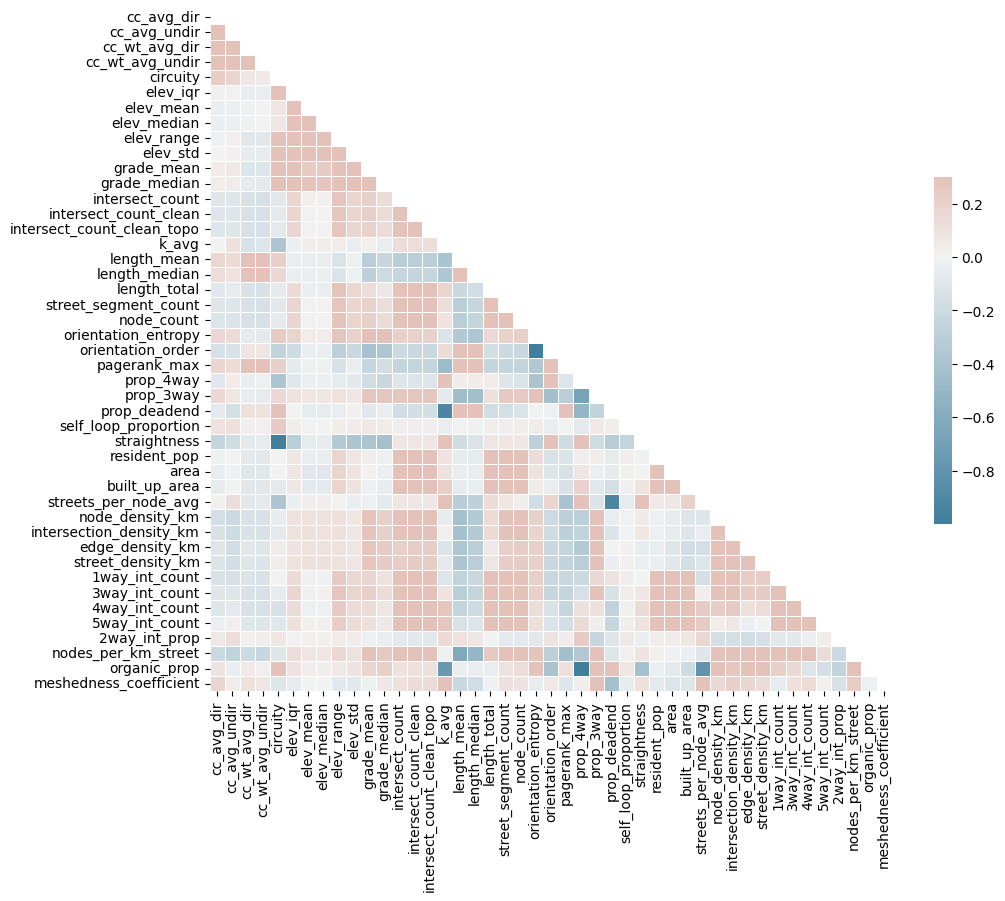